<a href="https://colab.research.google.com/github/kato1329/CATech/blob/main/BatchNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
folder_path = './drive/MyDrive/catimage/'

In [ ]:
###サンプルデータの作成：例としてRGB3チャンネルからなる画像データを生成
image_files = []
for image_num in range(5):
  image_name = 'cat{}.jpeg'.format(image_num+1)
  image_path = folder_path + image_name
  image = cv2.imread(image_path)
  image = cv2.resize(image,dsize=(224,224))
  image_files.append(image)
image_files = np.stack(image_files,axis=0)

In [ ]:
image_files.shape

(5, 224, 224, 3)

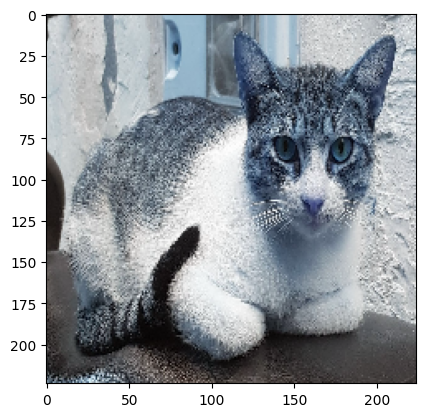

In [ ]:
plt.imshow(image_files[0])
plt.show()

In [ ]:
image_files = image_files.transpose(0,3,1,2)

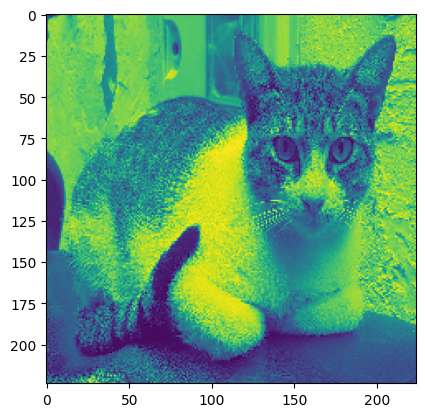

In [ ]:
plt.imshow(image_files[0][1])
plt.show()

(224, 224)


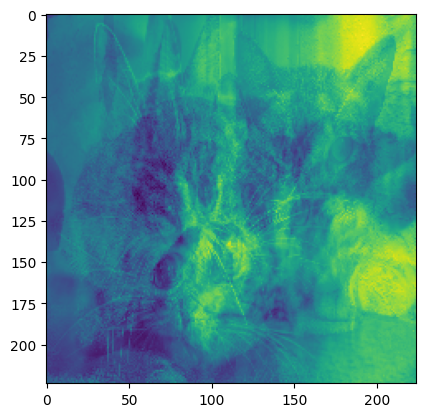

In [ ]:
"""
画像にはRGB3チャンネルがある。５枚の画像それぞれのR,G,Bチャンネルについて
とりだし同じチャンネルの中で平均を求める
"""
###Rチャンネルについての平均を求める
sum = np.zeros((224,224))
for i in range(5):
  channel_R_image = image_files[i][0]
  sum+=channel_R_image
mean_r = sum/5
print(mean_r.shape)
plt.imshow(mean_r)
plt.show()

うまくまざっていることが確かめられる

In [ ]:
###分散を同様に求める
sum = np.zeros((224,224))
for i in range(5):
  channel_R_image = image_files[i][0]
  sum += (channel_R_image - mean_r)**2
var_r = sum/5
var_r.shape

(224, 224)

In [ ]:
###Normalize
new_r = []
eps = np.full((224,224),0.001)
for i in range(5):
  channel_R_image = image_files[i][0]
  new_x = (channel_R_image - mean_r)/np.sqrt((var_r)**2 + eps)
  new_r.append(new_x)
new_r = np.stack(new_r,axis=0)

In [ ]:
new_r.shape

(5, 224, 224)

In [ ]:
###同様にGチャンネル、Bチャンネルについても平均、分散を求めて正規化する。
###Gチャンネル
sum = np.zeros((224,224))
for i in range(5):
  channel_G_image = image_files[i][1]
  sum+=channel_G_image
mean_g = sum/5

sum = np.zeros((224,224))
for i in range(5):
  channel_G_image = image_files[i][1]
  sum += (channel_G_image - mean_g)**2
var_g = sum/5

new_g = []
eps = np.full((224,224),0.001)
for i in range(5):
  channel_G_image = image_files[i][1]
  new_x = (channel_G_image - mean_g)/np.sqrt((var_g)**2 + eps)
  new_g.append(new_x)
new_g = np.stack(new_g,axis=0)
###Bチャンネル
sum = np.zeros((224,224))
for i in range(5):
  channel_B_image = image_files[i][2]
  sum+=channel_B_image
mean_b = sum/5

sum = np.zeros((224,224))
for i in range(5):
  channel_B_image = image_files[i][2]
  sum += (channel_B_image - mean_b)**2
var_b = sum/5

new_b = []
eps = np.full((224,224),0.001)
for i in range(5):
  channel_B_image = image_files[i][2]
  new_x = (channel_B_image - mean_b)/np.sqrt((var_b)**2 + eps)
  new_b.append(new_x)
new_b = np.stack(new_b,axis=0)



In [ ]:
type(new_r[0])

numpy.ndarray

In [ ]:
new_batch = []
for i in range(5):
  new_image = []
  new_r_layer = new_r[i]
  new_g_layer = new_g[i]
  new_b_layer = new_b[i]
  new_image.append(new_r_layer)
  new_image.append(new_g_layer)
  new_image.append(new_b_layer)
  new_image = np.stack(new_image,axis=0)
  new_batch.append(new_image)
new_batch = np.stack(new_batch,axis = 0)

In [ ]:
new_batch.shape
new_batch = new_batch.transpose(0,2,3,1)
new_batch = new_batch*50

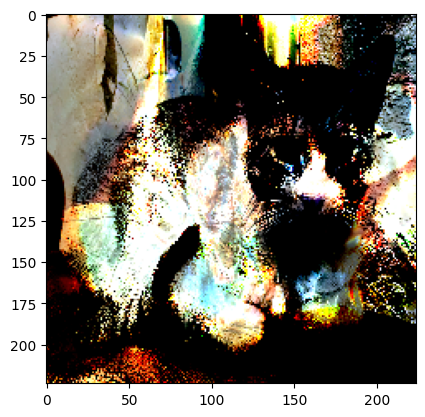

In [ ]:
sample_normalized_image = new_batch[0]
plt.imshow(sample_normalized_image)
plt.show()

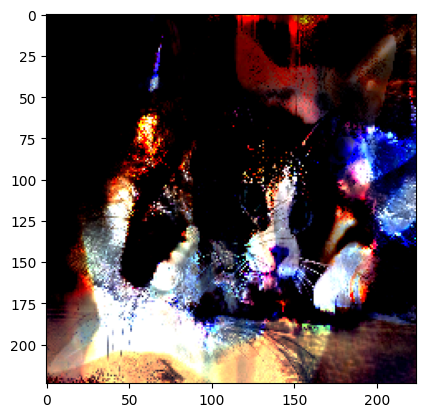

In [ ]:
sample_normalized_image = new_batch[1]
plt.imshow(sample_normalized_image)
plt.show()

In [ ]:
image_files_tensor = torch.from_numpy(image_files)
image_files_tensor = image_files_tensor.to(torch.float32)

In [ ]:
print(image_files_tensor.shape)
print(type(image_files_tensor))

torch.Size([5, 3, 224, 224])
<class 'torch.Tensor'>


In [ ]:
m = nn.BatchNorm2d(3,affine=False)
input = image_files_tensor
output = m(input)

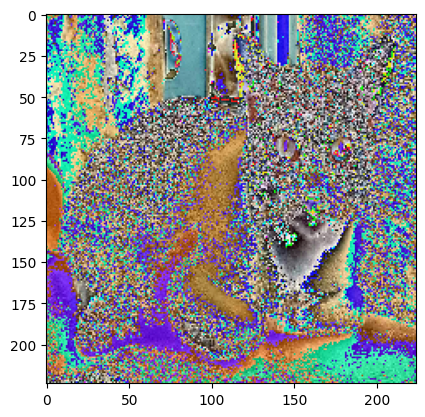

In [ ]:
plt.imshow(torchvision.transforms.functional.to_pil_image(output[0]))
plt.show()

In [ ]:
###正規の方法と表示が異なるのはそもそも最初の段階でtransposeした結果RGBチャンネルを正しく取得できていないからだと考えられる。
###それ以外の実装は間違っていないかな？
"""
メンターに聞く事項にしておく
"""